# Fuel Consumption Co2

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## Dataset:

In [208]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [209]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [210]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [212]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

### Features To Extract:
**ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, CO2EMISSIONS**

## Data Visualization:

In [213]:
#Feature 1: (ENGINESIZE)
X1 = df.iloc[:, 4].values
#Feature 2: (CYLINDERS)
X2 = df.iloc[:, 5].values
#Feature 3: (FUELCONSUMPTION_CITY)
X3 = df.iloc[:, 8].values
#Feature 4: (FUELCONSUMPTION_HWY)
X4 = df.iloc[:, 9].values
#Feature 5: (FUELCONSUMPTION_COMB)
X5 = df.iloc[:, 10].values

In [214]:
#Target values: (Co2 Emissions) 
y = df.iloc[:, -1].values

In [215]:
X1.shape

(1067,)

### Feature 1:

In [216]:
df['ENGINESIZE'].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2, 6. ,
       6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 1.8, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4])

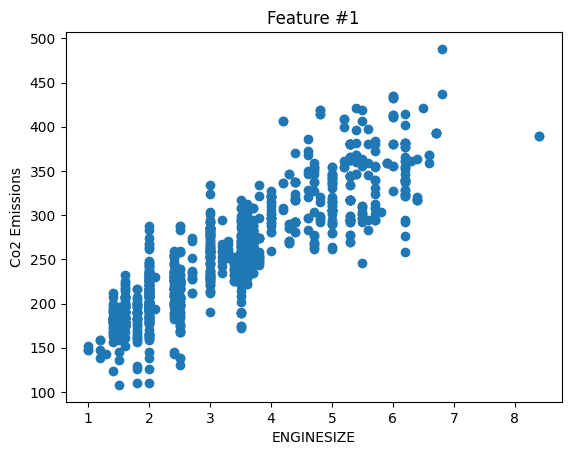

In [217]:
plt.scatter(X1, y)
plt.xlabel('ENGINESIZE')
plt.ylabel('Co2 Emissions')
plt.title('Feature #1')
plt.show()

### Feature 2:

In [218]:
df['CYLINDERS'].unique()

array([ 4,  6, 12,  8, 10,  3,  5], dtype=int64)

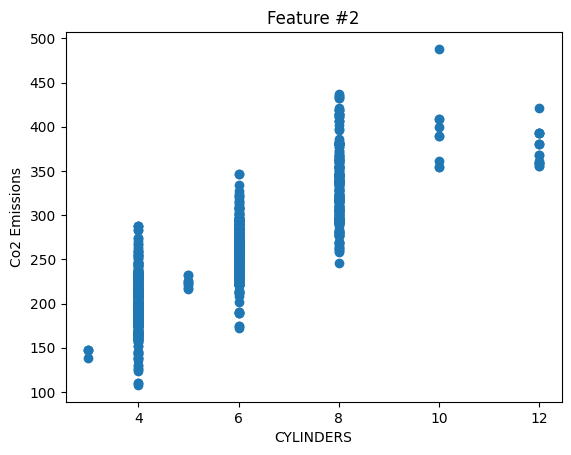

In [219]:
plt.scatter(X2, y)
plt.xlabel('CYLINDERS')
plt.ylabel('Co2 Emissions')
plt.title('Feature #2')
plt.show()

### Feature 3:

In [220]:
df['FUELCONSUMPTION_CITY'].unique()

array([ 9.9, 11.2,  6. , 12.7, 12.1, 11.9, 11.8, 12.8, 13.4, 10.6, 18. ,
       17.4, 18.1, 11.5, 10.8, 12. ,  9.8, 13.1, 13.5, 10. , 14.7, 18.2,
       10.1, 12.9, 10.3, 15.1, 17.6, 21.2, 18.8, 21.1, 15.3, 15.2, 13.2,
       14.6, 13.3, 14.2, 15.4, 14.9, 10.4, 16.8, 20. , 16.7, 22.3, 10.2,
        7.6, 11.4, 11.7,  9.2, 12.5, 14.4, 15. , 18.7, 10.5, 17.3, 16.2,
       12.6, 16.3, 13.6, 16.4, 13.7, 14.3,  9.5, 18.4, 19.4,  9.6, 11.6,
       12.3, 11.3, 19.7, 17. , 23.3, 25.7, 14.8, 14. ,  9.1,  8.7,  8.4,
       13.9, 19.8, 17.1, 23.5, 18.3, 23.7, 18.6, 23.9, 25.3, 21.9, 30. ,
       21.3, 22.1, 30.2,  9.3, 12.2, 18.9, 19.5, 19.9,  8.5,  8.9,  9.4,
        7.7, 16. , 21.5, 12.4, 15.8, 16.1, 14.1, 15.6, 17.7, 19.2, 14.5,
        7.9,  5.6, 24.1, 19.3, 24.9, 25.5, 20.6, 26.7, 10.9, 24.5, 15.9,
       20.1, 20.2, 22.4, 20.4,  8.6,  7.5,  8. ,  8.8,  5.3, 13. ,  9. ,
       11. ,  4.7,  8.1,  6.6,  8.3, 15.7,  6.5,  9.7,  8.2, 16.6, 11.1,
       18.5, 22.8, 17.2, 25. , 24. ,  5.5,  5.8,  6

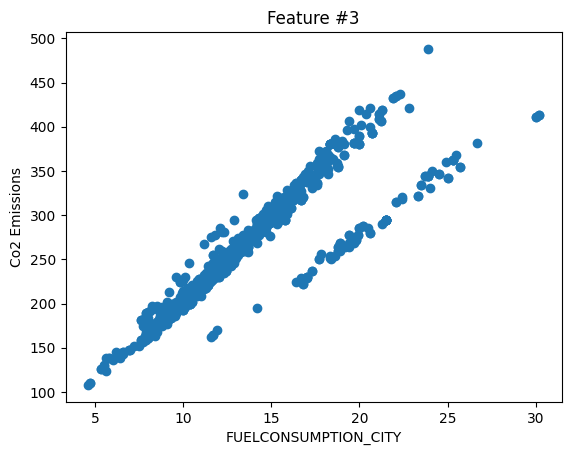

In [221]:
plt.scatter(X3, y)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('Co2 Emissions')
plt.title('Feature #3')
plt.show()

### Feature 4:

In [222]:
df['FUELCONSUMPTION_HWY'].unique()

array([ 6.7,  7.7,  5.8,  9.1,  8.7,  8.1,  9. ,  9.5,  7.5,  8.3, 12.6,
       11.3, 12.2,  7.4,  8.6,  6.4,  8.8,  9.7,  6.5,  8.5,  9.2,  7.6,
       10.9,  8.4, 11. , 13.4, 13.8,  9.3,  9.8, 10.1, 11.5, 10.3, 10.6,
       14.9,  7. ,  5.5,  7.2,  7.3,  7.9,  7.8,  8. ,  9.6,  7.1,  8.9,
       13.7,  9.9, 10.2, 13. ,  8.2, 12.9, 12.5, 11.8, 16.1, 17.8, 10.4,
        6.3,  5.1,  6. ,  5.6, 13.1, 13.6, 12.7, 17.7, 14.2, 18.8, 13.9,
       18.5, 19.3, 15. , 20.4, 14.3, 20.5, 11.4, 15.1, 11.7,  6.2,  6.6,
       11.1, 14.6,  6.8, 11.2, 10. , 13.3,  5.9, 10.8,  9.4,  6.9, 14.4,
       19.2, 14.7, 19.6, 20. , 15.5, 18. , 10.7, 12.3, 16.7, 15.3, 17. ,
       16.9,  5.7,  4.9,  6.1, 11.9, 12.1, 14.1, 12.8, 13.5, 12.4, 16.6,
       14.8, 15.9, 15.7, 10.5,  5.4, 12. , 14.5,  5.2])

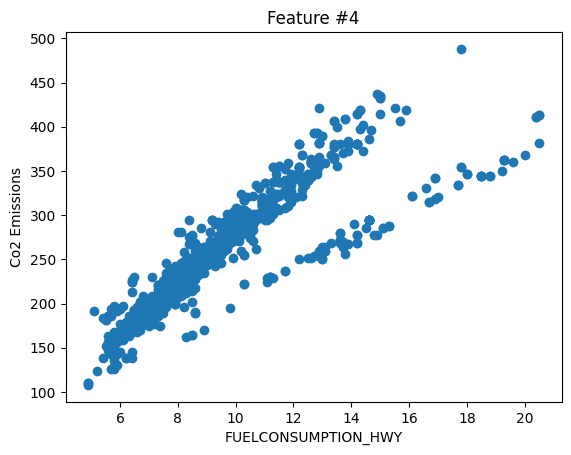

In [223]:
plt.scatter(X4, y)
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('Co2 Emissions')
plt.title('Feature #4')
plt.show()

### Feature 5:

In [224]:
df['FUELCONSUMPTION_COMB'].unique()

array([ 8.5,  9.6,  5.9, 11.1, 10.6, 10. , 10.1, 11.6,  9.2,  9.8, 10.4,
       15.6, 14.7, 15.4,  8.8,  9.3, 10.2, 10.9,  8.3, 11.2, 11.3,  8.4,
       12.5, 15.7, 10.5,  9.1, 13.2, 14.6, 17.7, 17.8, 13.3, 13.4, 12.6,
       11.4, 12.4, 12.2, 12.9, 12.7, 10.3, 15.5, 13.9, 16.5, 14. , 19. ,
        8.7,  6.7,  9.9,  7.9, 10.7, 13.8, 11. , 16.1, 11.9, 14.1, 12.1,
       12.3, 11.5,  8.2,  9.5,  9. , 10.8, 12.8, 16.6, 14.8, 20.1, 16.4,
       22.1, 11.8, 11.7, 12. ,  7.8,  7.1,  7.7, 16.2, 17. , 15.1, 15.9,
       20.9, 21.5, 22.6, 18. , 18.8, 25.7, 18.2, 18.9, 25.8, 14.3,  8. ,
       16.8, 16.9, 13. , 17.3,  7.5,  6.9, 18.4,  8.1, 14.4, 13.1,  8.6,
        7.3,  7.2,  6.8,  6. , 21.9, 17.2, 22.5, 23. , 21.2, 18.3, 23.9,
        9.4, 16. , 21.6, 16.7, 17.5, 19.7, 14.9, 20. , 19.9,  7.6,  6.6,
        7. ,  8.9,  5.5,  4.8,  6.3,  6.2, 14.5, 15. , 18.1, 13.7, 13.5,
       15.8,  9.7, 17.4, 21.4, 20.7,  5.6, 15.3,  7.4, 15.2, 14.2,  6.4,
       13.6, 17.1,  5.7,  4.7,  5.4])

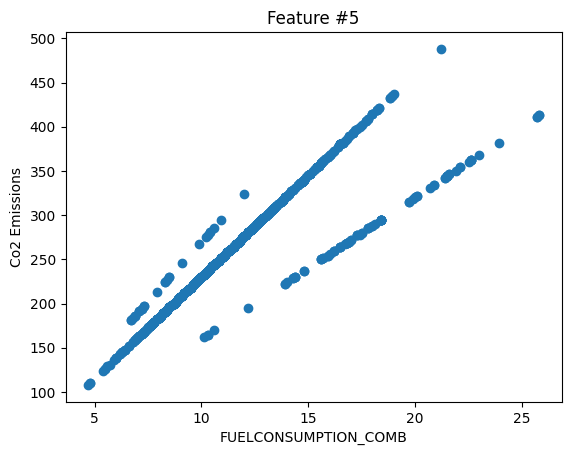

In [225]:
plt.scatter(X5, y)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Co2 Emissions')
plt.title('Feature #5')
plt.show()

## New DataFrame

In [226]:
df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_COMB_MPG'], axis = 1, inplace = True)
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [227]:
X = df.iloc[:, 0:-1].values
X.shape

(1067, 5)

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [229]:
print(X_train, X_train.shape)

[[ 2.4  4.  11.3  8.3 10. ]
 [ 3.6  6.  18.3 12.6 15.7]
 [ 5.3  8.  18.  13.4 15.9]
 ...
 [ 3.7  6.  13.5  9.6 11.7]
 [ 5.   8.  15.8 10.2 13.3]
 [ 3.7  6.  13.1  9.3 11.4]] (746, 5)


In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [231]:
X_train

array([[-0.68, -1.  , -0.51, -0.44, -0.48],
       [ 0.17,  0.1 ,  1.21,  1.09,  1.16],
       [ 1.38,  1.21,  1.13,  1.37,  1.22],
       ...,
       [ 0.24,  0.1 ,  0.03,  0.02,  0.01],
       [ 1.17,  1.21,  0.59,  0.23,  0.47],
       [ 0.24,  0.1 , -0.07, -0.09, -0.08]])

In [241]:
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [242]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))
mse = mean_squared_error(y_test, y_pred)
mse

437.39903148291927

In [234]:
from sklearn.ensemble import RandomForestRegressor

In [235]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test  = model.predict(X_test)

In [236]:
#Root Mean Squared Error
mse_train = np.sqrt(mean_squared_error(y_hat_train, y_train))
mse_test = np.sqrt(mean_squared_error(y_hat_test, y_test))

In [237]:
np.set_printoptions(precision=2)
print(np.concatenate((y_hat_test.reshape(len(y_hat_test),1), y_test.reshape(len(y_test),1)),1))

[[353.52 356.  ]
 [209.37 209.  ]
 [230.   230.  ]
 [214.1  212.  ]
 [183.24 168.  ]
 [292.   292.  ]
 [212.01 212.  ]
 [277.16 276.  ]
 [201.99 202.  ]
 [331.43 334.  ]
 [309.49 313.  ]
 [435.96 437.  ]
 [216.53 224.  ]
 [280.59 281.  ]
 [175.34 177.  ]
 [260.64 260.  ]
 [410.88 414.  ]
 [222.9  223.  ]
 [260.88 251.  ]
 [361.7  359.  ]
 [191.12 191.  ]
 [192.66 189.  ]
 [244.39 244.  ]
 [243.61 242.  ]
 [130.81 131.  ]
 [282.16 283.  ]
 [274.07 274.  ]
 [295.08 294.  ]
 [246.66 246.  ]
 [117.53 110.  ]
 [358.57 359.  ]
 [241.6  239.  ]
 [233.31 229.  ]
 [236.69 237.  ]
 [191.12 191.  ]
 [196.   196.  ]
 [293.41 294.  ]
 [221.04 221.  ]
 [209.87 237.  ]
 [237.82 237.  ]
 [184.4  184.  ]
 [183.74 184.  ]
 [201.88 202.  ]
 [171.01 194.  ]
 [297.07 297.  ]
 [197.97 198.  ]
 [259.88 260.  ]
 [178.98 179.  ]
 [344.   344.  ]
 [358.43 359.  ]
 [338.33 338.  ]
 [282.3  288.  ]
 [290.15 290.  ]
 [130.67 129.  ]
 [230.   230.  ]
 [178.98 179.  ]
 [280.94 283.  ]
 [160.88 159.  ]
 [258.06 258. 

In [238]:
print(f'Training loss: {mse_train}, Test loss: {mse_test}')

Training loss: 4.677324156897007, Test loss: 11.146478534103597


In [239]:
from sklearn.model_selection import cross_val_score

val_scores = cross_val_score(model,X_train,y_train,cv=5,scoring='r2')

In [240]:
val_scores = np.sqrt(val_scores)
print(val_scores)

[0.97 0.98 0.99 0.97 0.98]
